In [2]:
%load_ext signature
%matplotlib inline

import os

import helpers
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use('ramiro')

total_commit_count = 151573032

data_dir = os.path.expanduser('~/data')
df = pd.read_csv(os.path.join(data_dir, 'github/github_commit_message_count_ignore_merge.csv'), index_col='msg', na_values=['NaN'], keep_default_na=False)

chartinfo = '''Based on {:,d} commit messages, that were lowercased and trimmed of whitespace before aggregation. Messages starting with 'merge' were ignored.
Author: Ramiro Gómez - ramiro.org • Data: GitHub on BigQuery - bigquery-public-data:github_repos.commits'''.format(total_commit_count)

In [3]:
df['percent'] = df.msg_count / total_commit_count * 100
limit = 30
title = 'The {} most frequent commit messages on GitHub till June 2016'.format(limit)
series = df.percent.sort_values().tail(limit)
ticks = np.arange(limit)

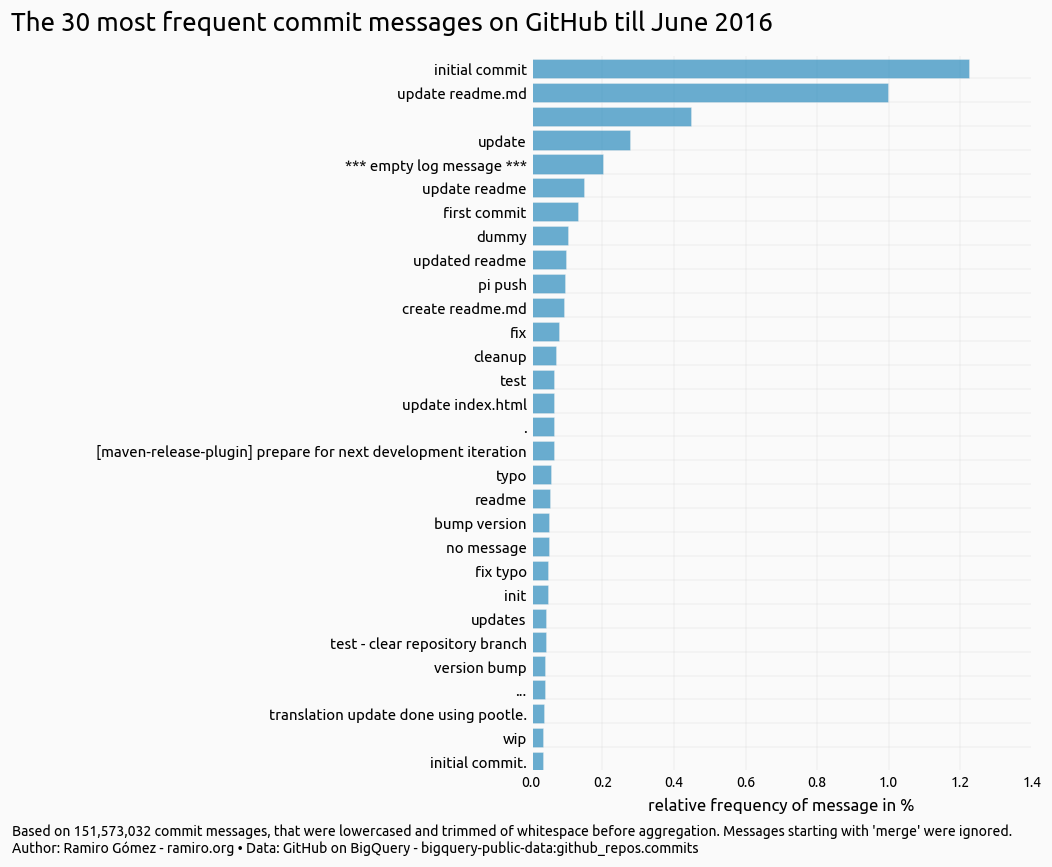

In [4]:
fig = plt.figure(figsize=(8, 12))
fig.suptitle(title, fontsize=26, y=.95, ha='right')

ax = fig.add_subplot(1, 1, 1)
ax.barh(ticks, series.values, alpha=.7, color='#2b8cbe')
ax.set_yticks(ticks)
ax.set_yticklabels(series.index, fontsize=15, va='bottom')
ax.set_xlabel('relative frequency of message in %', labelpad=8)

fig.text(-.82, -.025, chartinfo, fontsize=14, ha='left')
plt.savefig('img/{}.png'.format(helpers.slug(title)), bbox_inches='tight')

In [5]:
series.sum()

4.807563656838375

In [6]:
series

msg
initial commit.                                                  0.033093
wip                                                              0.033942
translation update done using pootle.                            0.037936
...                                                              0.041130
version bump                                                     0.041187
test - clear repository branch                                   0.042203
updates                                                          0.042743
init                                                             0.049003
fix typo                                                         0.049171
no message                                                       0.050162
bump version                                                     0.050443
readme                                                           0.054236
typo                                                             0.055476
[maven-release-plugin] prepare for

In [9]:
df.percent.sort_values().tail(100)

msg
fix readme                                                       0.011876
stuff                                                            0.011943
update composer.json                                             0.012062
1                                                                0.012106
testing                                                          0.012181
update docs                                                      0.012225
update readme.                                                   0.012298
initial revision                                                 0.012364
updating readme                                                  0.012409
added a comment                                                  0.012538
update dependencies                                              0.012552
publish page-1 index                                             0.012621
fix bug                                                          0.012814
update last sha                   